# Crypto Prices Financial Analysis

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset and First Observations

In [158]:
cdp = pd.read_csv('crypto_daily_prices.csv', parse_dates=['Date'] , index_col='Date')
cdr = pd.read_csv('crypto_daily_returns.csv', parse_dates=['Date'] , index_col='Date')

In [159]:
print(cdp.shape)
print(cdr.shape)

(2833, 3)
(2833, 3)


**Her iki veri setini birlestirmek isimizi kolaylastirabilir, indexlerinin ve degiskenlerin align olup olmadigini kontrol edelim**

In [160]:
cdp.index.equals(cdr.index)

True

In [161]:
print(cdp.columns, '\n', cdr.columns)

Index(['BTC', 'ETH', 'ADA'], dtype='object') 
 Index(['BTC', 'ETH', 'ADA'], dtype='object')


In [162]:
cdp = cdp.add_suffix('_Price')
cdr = cdr.add_suffix('_Returns')

In [163]:
df = pd.concat([cdp, cdr], axis=1)
df.head()

BTC_Price  ETH_Price  ADA_Price  BTC_Returns  ETH_Returns  \
Date                                                                     
2014-09-17  457.334015        NaN        NaN     0.000000          0.0   
2014-09-18  424.440002        NaN        NaN    -7.192558          NaN   
2014-09-19  394.795990        NaN        NaN    -6.984264          NaN   
2014-09-20  408.903992        NaN        NaN     3.573492          NaN   
2014-09-21  398.821014        NaN        NaN    -2.465854          NaN   

            ADA_Returns  
Date                     
2014-09-17          0.0  
2014-09-18          NaN  
2014-09-19          NaN  
2014-09-20          NaN  
2014-09-21          NaN

In [164]:
len(df)

2833

## Observing the Historical Data in different TimeFrames

__Pandas kutuphanesinin gorsellestirme araclari bazen cok pratik sonuclar uretebiliyor__

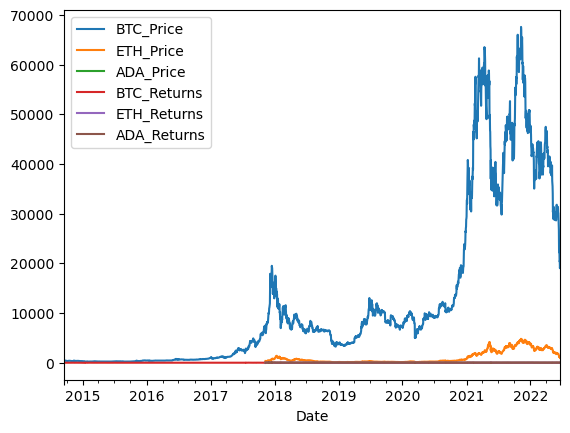

In [165]:
df.plot();

**Her ne kadar cok hizli bir sekilde grafikler uretebiliyorasak ise de bizim soz konusu ozel durumumuzda, assetlerin eksenlerindeki uyumsuzlugundan dolayi anlamli bir gorsellestirme uretemedi pandas plot methodu**  

**Pandas plot methodunun bir diger guclu ozelligi ise dataframe deki degiskenler icin cok seri olarak subplotlar cizebilmesidir**

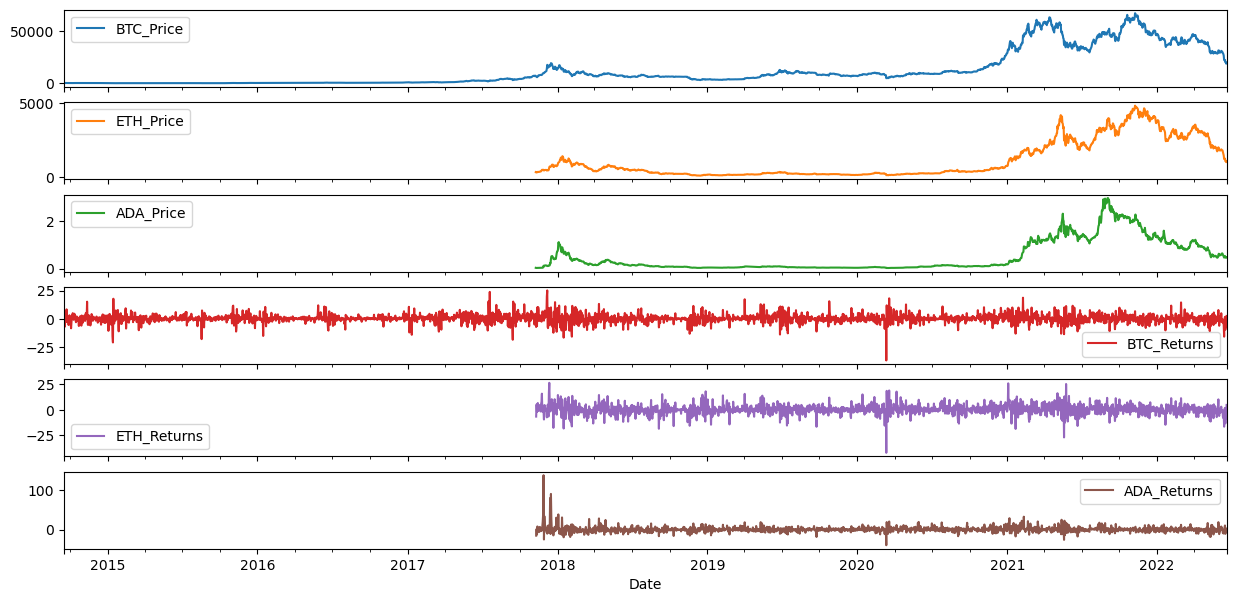

In [166]:
df.plot(subplots=True, figsize=(15,7));

__Genel anlamda verileri 2018 sonrasi olusmaya baslamis, paralellik acisindan onceki verileri dusurebiliriz__

__bu tarz zaman serilerinde haftalik ve aylik grafikler genel trendi gormekte ise yarayabilir, Yeni haliyle datamizi tekrar gorsellestirelim ancak bu sefer haftalik verilere bir bakalim__  


In [167]:
df = df.dropna()

In [168]:
agg_dictionary = {
                    'BTC_Price'  : 'last',
                    'ETH_Price'  : 'last' , 
                    'ADA_Price'  : 'last',
                    'BTC_Returns': 'sum' , #normalde cumulative olarak sum almak gerekli aslinda ama simdilik basitlige kacalim
                    'ETH_Returns': 'sum',
                    'ADA_Returns': 'sum'
                }

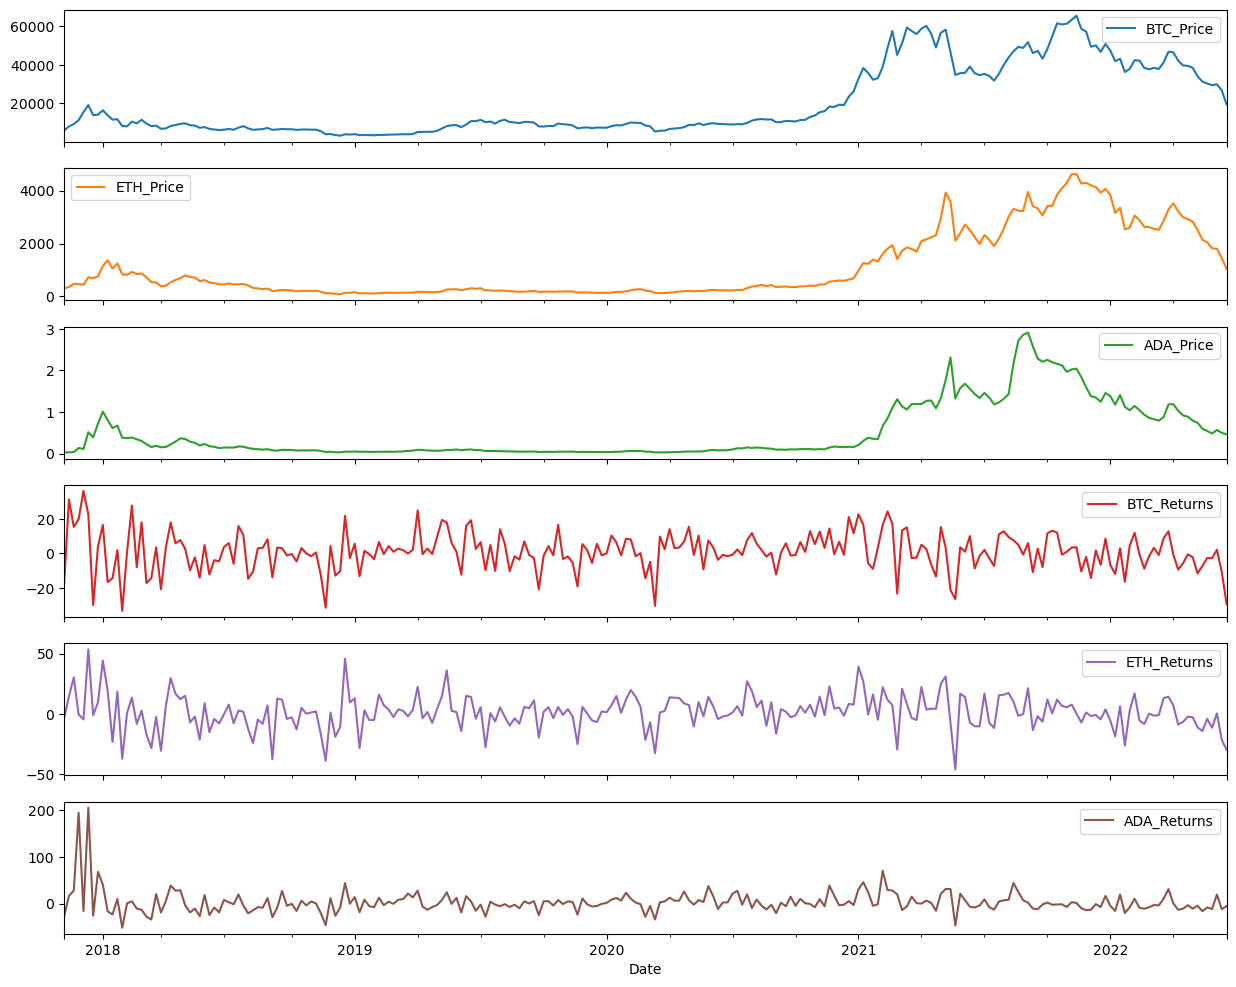

In [169]:
df_weekly = df.resample('1W').agg(agg_dictionary)
df_monthly = df.resample('M').agg(agg_dictionary)
df_weekly.plot(subplots=True, figsize=(15,12));

## Exploring Daily Returns for each Crypto Asset

**Lets also have a look of daily returns for each crypto coin. How are they distributed. Lets make some visualizations**

__Way-1: Fast But Limited Power__

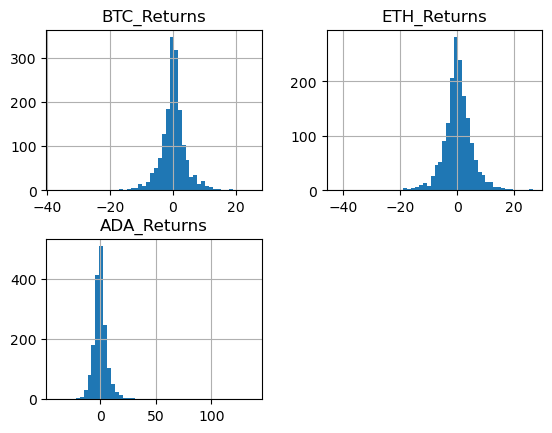

In [170]:
df[['BTC_Returns', 'ETH_Returns', 'ADA_Returns']].hist(bins=50);

__Way-2: A More Stronger but time consuming Approach__

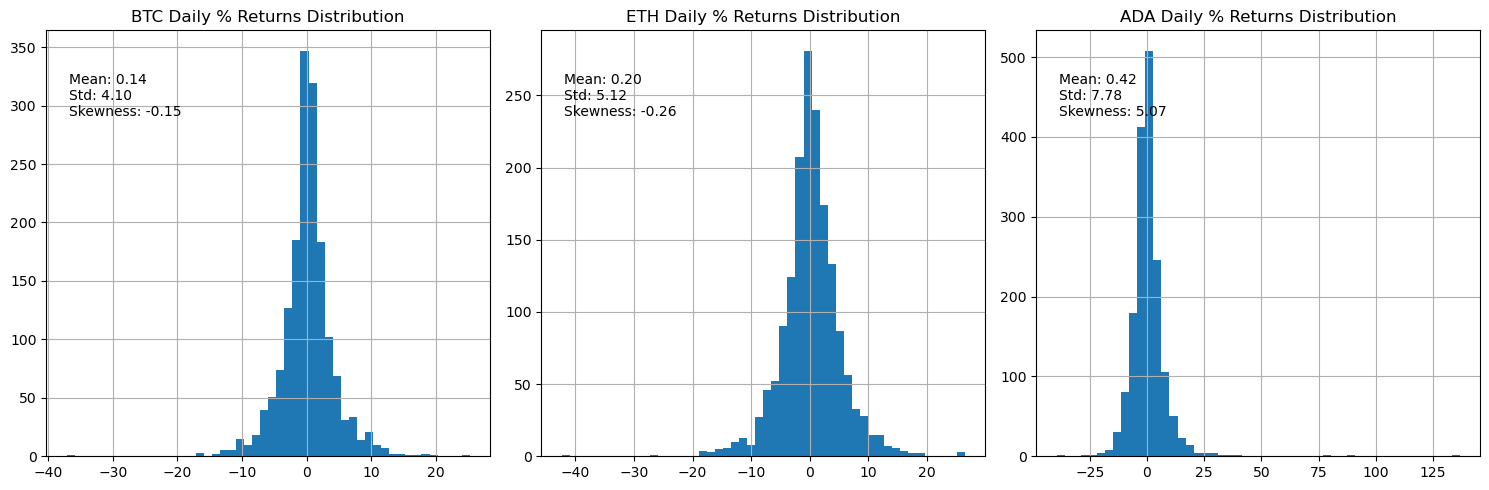

In [171]:
# Calculate mean and standard deviation
mean_BTC = df['BTC_Returns'].mean()
std_BTC = df['BTC_Returns'].std()
skew_BTC = df['BTC_Returns'].skew()

mean_ETH = df['ETH_Returns'].mean()
std_ETH = df['ETH_Returns'].std()
skew_ETH = df['ETH_Returns'].skew()

mean_ADA = df['ADA_Returns'].mean()
std_ADA = df['ADA_Returns'].std()
skew_ADA = df['ADA_Returns'].skew()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms and add text
df['BTC_Returns'].hist(bins=50, ax=axes[0])
axes[0].text(0.05, 0.9, f'Mean: {mean_BTC:.2f}\nStd: {std_BTC:.2f}\nSkewness: {skew_BTC:.2f}', transform=axes[0].transAxes, fontsize=10, verticalalignment='top')
axes[0].set_title('BTC Daily % Returns Distribution')

df['ETH_Returns'].hist(bins=50, ax=axes[1])
axes[1].text(0.05, 0.9, f'Mean: {mean_ETH:.2f}\nStd: {std_ETH:.2f}\nSkewness: {skew_ETH:.2f}', transform=axes[1].transAxes, fontsize=10, verticalalignment='top')
axes[1].set_title('ETH Daily % Returns Distribution')

df['ADA_Returns'].hist(bins=50, ax=axes[2])
axes[2].text(0.05, 0.9, f'Mean: {mean_ADA:.2f}\nStd: {std_ADA:.2f}\nSkewness: {skew_ADA:.2f}', transform=axes[2].transAxes, fontsize=10, verticalalignment='top')
axes[2].set_title('ADA Daily % Returns Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

__What does it mean?__

* The most important factor here is standard deviation, since the **standard deviation** of returns for an asset is generally assumed as a RISK LEVEL of this asset.
* Skewness in ADA is very high, what is the reason: most probably due to OUTLIERS
* A professional eye can infer insights from histograms in many aspects but sometimes using different visuals are the best use

**What is the best way to observe outliers**

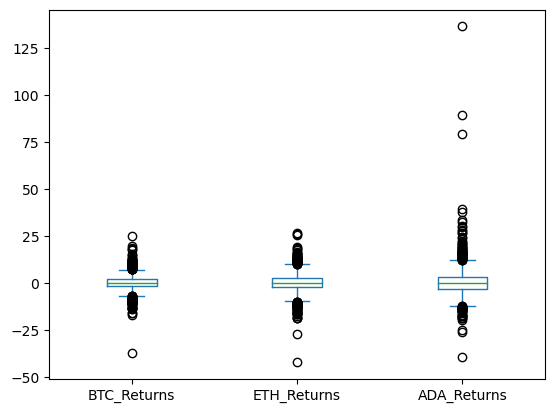

In [172]:
df[['BTC_Returns', 'ETH_Returns', 'ADA_Returns']].plot.box();

## Some Financial Analysis of the Assets

Datasetimize tekrar bakalim

In [173]:
df

BTC_Price    ETH_Price  ADA_Price  BTC_Returns  ETH_Returns  \
Date                                                                         
2017-11-10   6618.140137   299.252991   0.027119    -7.355415    -6.741069   
2017-11-11   6357.600098   314.681000   0.027437    -3.936756     5.155507   
2017-11-12   5950.069824   307.907989   0.023977    -6.410128    -2.152342   
2017-11-13   6559.490234   316.716003   0.025808    10.242240     2.860599   
2017-11-14   6635.750000   337.631012   0.026230     1.162587     6.603711   
...                  ...          ...        ...          ...          ...   
2022-06-15  22572.839840  1233.206421   0.533296     1.648355     1.778018   
2022-06-16  20381.650390  1067.730713   0.475022    -9.707194   -13.418330   
2022-06-17  20471.482420  1086.519287   0.487392     0.440750     1.759673   
2022-06-18  19017.642580   993.636780   0.456182    -7.101781    -8.548629   
2022-06-19  19488.886720  1040.510254   0.464109     2.477931     4.717365   

            ADA_Returns  
Date                     
2017-11-10   -15.393258  
2017-11-11     1.172610  
2017-11-12   -12.610708  
2017-11-13     7.636481  
2017-11-14     1.635156  
...                 ...  
2022-06-15    10.097317  
2022-06-16   -10.927140  
2022-06-17     2.604094  
2022-06-18    -6.403471  
2022-06-19     1.737703  

[1683 rows x 6 columns]

Return degiskenlerimiz bize assetlerin getirileri hakkinda bilgi sagliyor ancak Finansal verilerde yaygin olarak kullanilan **log returns** kullanilip kullanilmadigini kontrol edelim. Log return konusu icin daha fazla konusulabilir ancak temel olarak getirinin gun sonunda birden olusmadigi ancak dakika dakika hatta saniye saniye getirinin ve kapitalin degistigi varsayimiyla daha gercekci bir yaklasim ortaya koyar

In [174]:
df['BTC_returns_pct'] =  df['BTC_Price'].pct_change(periods=1) 
df.head()

BTC_Price   ETH_Price  ADA_Price  BTC_Returns  ETH_Returns  \
Date                                                                       
2017-11-10  6618.140137  299.252991   0.027119    -7.355415    -6.741069   
2017-11-11  6357.600098  314.681000   0.027437    -3.936756     5.155507   
2017-11-12  5950.069824  307.907989   0.023977    -6.410128    -2.152342   
2017-11-13  6559.490234  316.716003   0.025808    10.242240     2.860599   
2017-11-14  6635.750000  337.631012   0.026230     1.162587     6.603711   

            ADA_Returns  BTC_returns_pct  
Date                                      
2017-11-10   -15.393258              NaN  
2017-11-11     1.172610        -0.039368  
2017-11-12   -12.610708        -0.064101  
2017-11-13     7.636481         0.102422  
2017-11-14     1.635156         0.011626

Goruldugu gibi esasinda Returns **Arithmetic Returns** olarak sunulmus

In [175]:
columns_to_drop = ['BTC_Returns', 'ETH_Returns', 'ADA_Returns', 'BTC_returns_pct']
df.drop(columns=columns_to_drop, inplace=True)

In [176]:
def add_log_returns(df, price_column):
    '''This function takes a dataframe and a price column name
    Eventually adds new columns for log returns and cumulative log returns(HODL)
    '''
    new_column_name_returns = price_column[:3] + '_L_Ret'
    new_column_name_cum_returns = price_column[:3] + '_Cum_Ret'
    df[new_column_name_returns] = np.log(df[price_column].div(df[price_column].shift(1)))
    df[new_column_name_cum_returns] = df[new_column_name_returns].cumsum().apply(np.exp)
    
    return df

In [177]:
for col in df.columns:
    add_log_returns(df, col)
df.dropna(inplace=True)

In [178]:
df

BTC_Price    ETH_Price  ADA_Price  BTC_L_Ret  BTC_Cum_Ret  \
Date                                                                       
2017-11-11   6357.600098   314.681000   0.027437  -0.040163     0.960632   
2017-11-12   5950.069824   307.907989   0.023977  -0.066248     0.899055   
2017-11-13   6559.490234   316.716003   0.025808   0.097510     0.991138   
2017-11-14   6635.750000   337.631012   0.026230   0.011559     1.002661   
2017-11-15   7315.540039   333.356995   0.026445   0.097529     1.105377   
...                  ...          ...        ...        ...          ...   
2022-06-15  22572.839840  1233.206421   0.533296   0.016349     3.410753   
2022-06-16  20381.650390  1067.730713   0.475022  -0.102112     3.079664   
2022-06-17  20471.482420  1086.519287   0.487392   0.004398     3.093238   
2022-06-18  19017.642580   993.636780   0.456182  -0.073666     2.873563   
2022-06-19  19488.886720  1040.510254   0.464109   0.024477     2.944768   

            ETH_L_Ret  ETH_Cum_Ret  ADA_L_Ret  ADA_Cum_Ret  
Date                                                        
2017-11-11   0.050270     1.051555   0.011658     1.011726  
2017-11-12  -0.021758     1.028922  -0.134797     0.884140  
2017-11-13   0.028204     1.058355   0.073589     0.951657  
2017-11-14   0.063948     1.128246   0.016219     0.967219  
2017-11-15  -0.012740     1.113964   0.008163     0.975147  
...               ...          ...        ...          ...  
2022-06-15   0.017624     4.120949   0.096194    19.665031  
2022-06-16  -0.144082     3.567987  -0.115716    17.516206  
2022-06-17   0.017444     3.630772   0.025708    17.972344  
2022-06-18  -0.089363     3.320390  -0.066177    16.821491  
2022-06-19   0.046095     3.477025   0.017228    17.113798  

[1682 rows x 9 columns]

* Burada daha detayli incelerseniz aslinda log returnler ile arithmetic returnler arasinda buyuk bir fark olmamakla birlikte mevcut bir fark bulundugu goruluyor.  
* **Daha onemlisi ise:** Cum_Ret son satirina bakarsaniz aslinda  **investment multiple** dedigimiz katsayiya ulastigimizi gorebiliriz ki bu deger esasinda HODL kazanc oranidir
* Aslinda bu degeri assetin ilk ve son fiyatlarini karsilastirarak da bulabilirdik ancak aradaki farka grafiklestirerek bakalim

In [179]:
df[['BTC_Cum_Ret','ETH_Cum_Ret', 'ADA_Cum_Ret']].describe().T

count       mean        std       min       25%       50%  \
BTC_Cum_Ret  1682.0   3.048025   2.681515  0.489074  1.119280  1.538198   
ETH_Cum_Ret  1682.0   3.676867   4.175608  0.281729  0.670604  1.392355   
ADA_Cum_Ret  1682.0  18.419694  24.282606  0.883550  2.105065  4.758048   

                   75%         max  
BTC_Cum_Ret   5.439237   10.209338  
ETH_Cum_Ret   6.328344   16.080332  
ADA_Cum_Ret  32.834700  109.452379

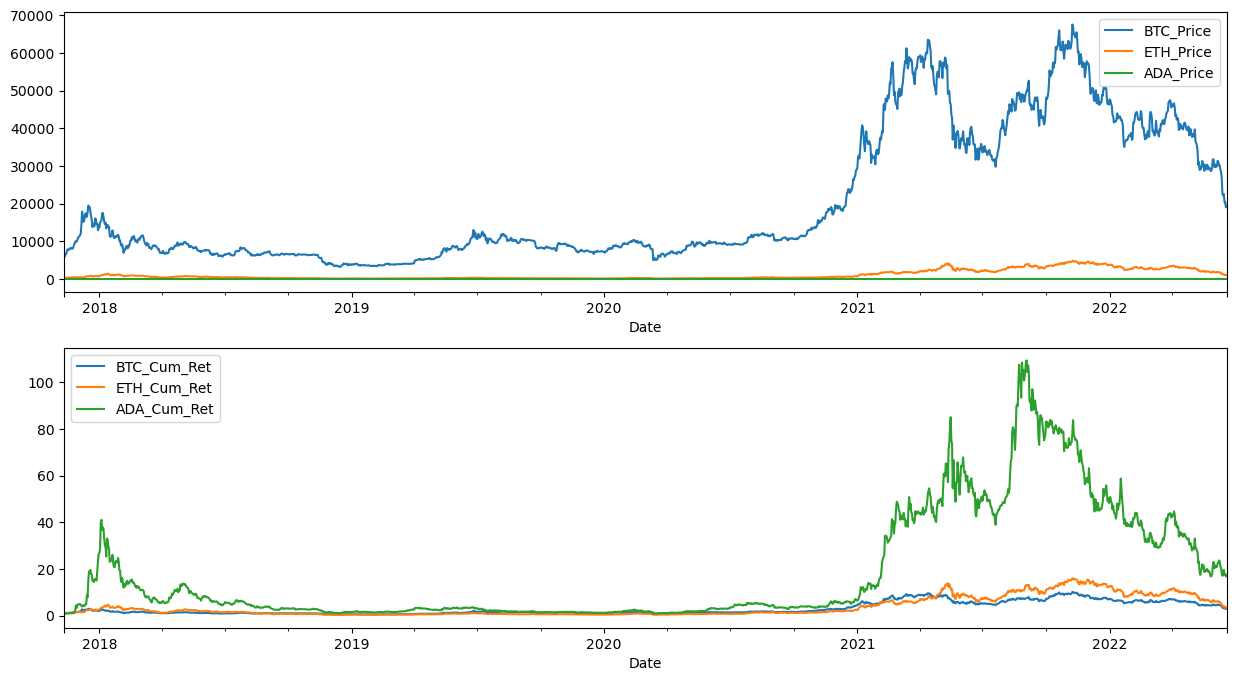

In [180]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

df[['BTC_Price', 'ETH_Price', 'ADA_Price']].plot(ax=axes[0])
df[['BTC_Cum_Ret','ETH_Cum_Ret', 'ADA_Cum_Ret']].plot(ax=axes[1])
plt.show()


__what does these graph says?__

birinci grafikte kripto para birimlerinin fiyat hareketlerini karsilastirabilmek icin ayni grafik uzerinde gormek istedik ancak normal olarak ve en basta da karsilastigimiz gibi olcekleri fakrli oldugu icin karsilastirmak mumkun olamadi  

ikinci grafikte ise fiyatlari bir nevi **normalize ettik** ve birbirleriyle karsilastirilabilir bir konuma getirmis olduk  

normalize etmek de aslinda ayri bir yontem ve yapilabilirdi, deneyelim:

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
scaler = MinMaxScaler()

In [186]:
columns_to_normalize = ['BTC_Price', 'ETH_Price', 'ADA_Price']

df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df_normalized

BTC_Price  ETH_Price  ADA_Price  BTC_L_Ret  BTC_Cum_Ret  \
Date                                                                  
2017-11-11   0.048513   0.048727   0.001181  -0.040163     0.960632   
2017-11-12   0.042178   0.047295   0.000005  -0.066248     0.899055   
2017-11-13   0.051651   0.049158   0.000627   0.097510     0.991138   
2017-11-14   0.052837   0.053582   0.000771   0.011559     1.002661   
2017-11-15   0.063404   0.052678   0.000844   0.097529     1.105377   
...               ...        ...        ...        ...          ...   
2022-06-15   0.300576   0.243010   0.172991   0.016349     3.410753   
2022-06-16   0.266514   0.208009   0.153199  -0.102112     3.079664   
2022-06-17   0.267911   0.211983   0.157401   0.004398     3.093238   
2022-06-18   0.245311   0.192337   0.146800  -0.073666     2.873563   
2022-06-19   0.252637   0.202252   0.149493   0.024477     2.944768   

            ETH_L_Ret  ETH_Cum_Ret  ADA_L_Ret  ADA_Cum_Ret  
Date                                                        
2017-11-11   0.050270     1.051555   0.011658     1.011726  
2017-11-12  -0.021758     1.028922  -0.134797     0.884140  
2017-11-13   0.028204     1.058355   0.073589     0.951657  
2017-11-14   0.063948     1.128246   0.016219     0.967219  
2017-11-15  -0.012740     1.113964   0.008163     0.975147  
...               ...          ...        ...          ...  
2022-06-15   0.017624     4.120949   0.096194    19.665031  
2022-06-16  -0.144082     3.567987  -0.115716    17.516206  
2022-06-17   0.017444     3.630772   0.025708    17.972344  
2022-06-18  -0.089363     3.320390  -0.066177    16.821491  
2022-06-19   0.046095     3.477025   0.017228    17.113798  

[1682 rows x 9 columns]

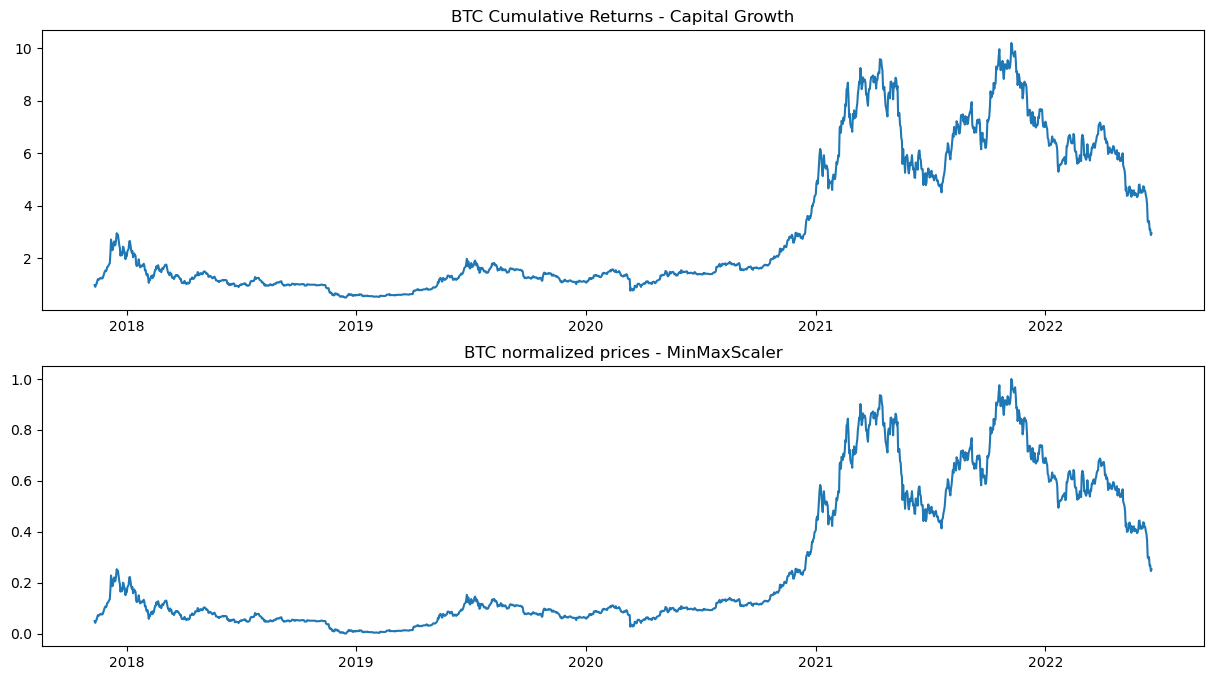

In [191]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
ax[0].plot(df['BTC_Cum_Ret'])
ax[0].set_title('BTC Cumulative Returns - Capital Growth')

ax[1].plot(df_normalized['BTC_Price'])
ax[1].set_title('BTC normalized prices - MinMaxScaler')

plt.show()

## Graphing Candle Stick Charts

### More Data Needed for Candlestick Charts

In [221]:
import ccxt

In [217]:
def get_history(symbol, interval, start = None, limit = 1000):
    
    if start:
        start = binance.parse8601(start)
    
    data = binance.fetchOHLCV(symbol = symbol, timeframe = interval, since = start, limit = limit)
    
    df = pd.DataFrame(data)
    df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
    df.Date = pd.to_datetime(df.Date, unit = "ms")
    df.set_index("Date", inplace = True)

    return df

In [226]:
binance = ccxt.binance()
BTC_OHLCV = get_history(symbol = "BTC/USDT", interval = "1d", limit = 100)
BTC_OHLCV

Open      High       Low     Close       Volume
Date                                                           
2023-07-10  30160.71  31045.78  29950.00  30411.57  41262.87652
2023-07-11  30411.57  30813.63  30300.00  30622.10  28476.83311
2023-07-12  30622.10  30983.25  30210.00  30380.00  38108.99669
2023-07-13  30380.00  31804.20  30251.00  31454.23  70772.51836
2023-07-14  31454.23  31630.00  29900.00  30312.01  60749.48424
...              ...       ...       ...       ...          ...
2023-10-13  26759.63  27130.00  26685.00  26862.00  24115.76499
2023-10-14  26862.00  26989.58  26789.00  26852.48  10417.25576
2023-10-15  26852.48  27293.33  26808.25  27154.15  15274.69170
2023-10-16  27154.14  30000.00  27112.66  28500.78  78399.22445
2023-10-17  28500.77  28549.34  28069.32  28460.59  15910.27671

[100 rows x 5 columns]

### Matplotlib mplfinance

In [222]:
import mplfinance as mpf

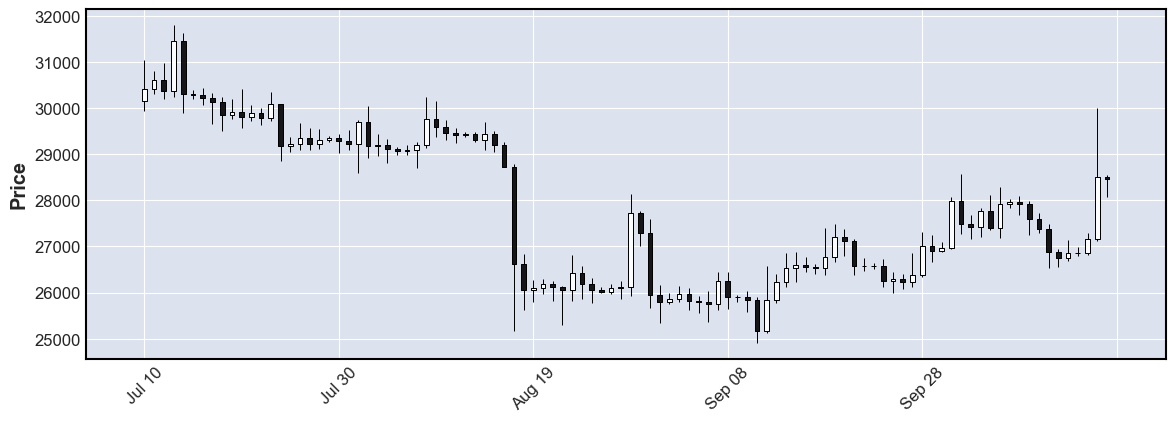

In [227]:
mpf.plot(BTC_OHLCV, type='candle', figsize=(15,5))

### Plotly

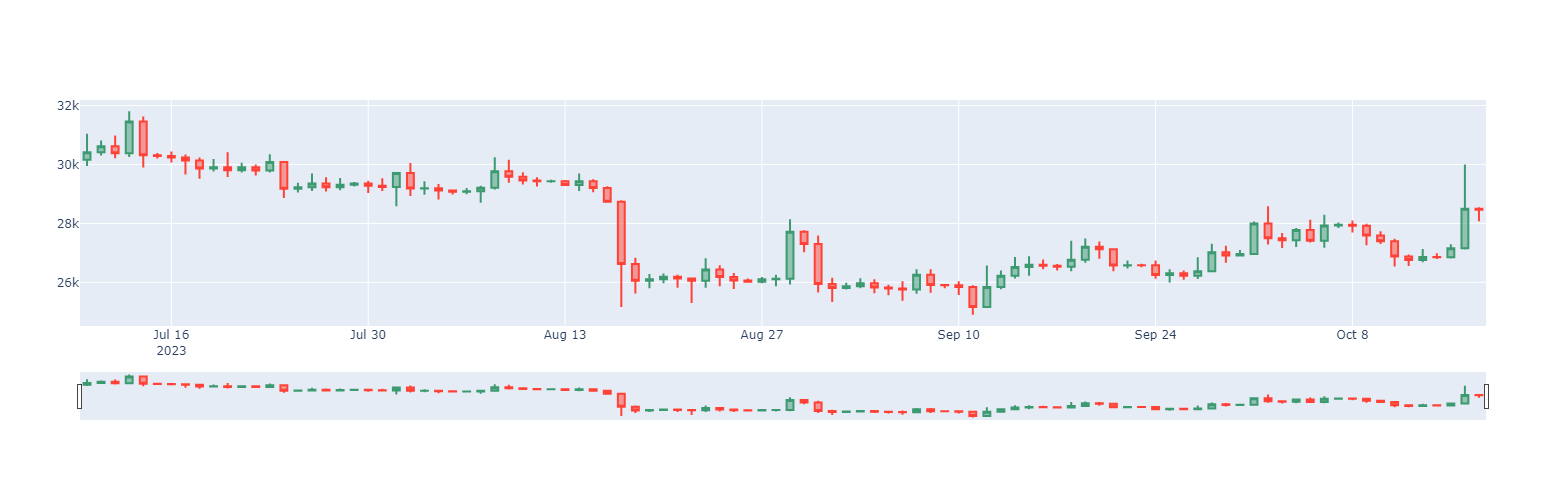

In [238]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=BTC_OHLCV.index,
                                    open=BTC_OHLCV['Open'],
                                    high=BTC_OHLCV['High'],
                                    low=BTC_OHLCV['Low'],
                                    close=BTC_OHLCV['Close'])])
fig.update_layout(width=1200, height=500)
fig.show()

## Relationships between the Crypto Assests

In [248]:
df_prices = df[['BTC_Price', 'ETH_Price', 'ADA_Price']]
df_returns = df[['BTC_L_Ret', 'ETH_L_Ret', 'ADA_L_Ret']]

#### Relation between the prices

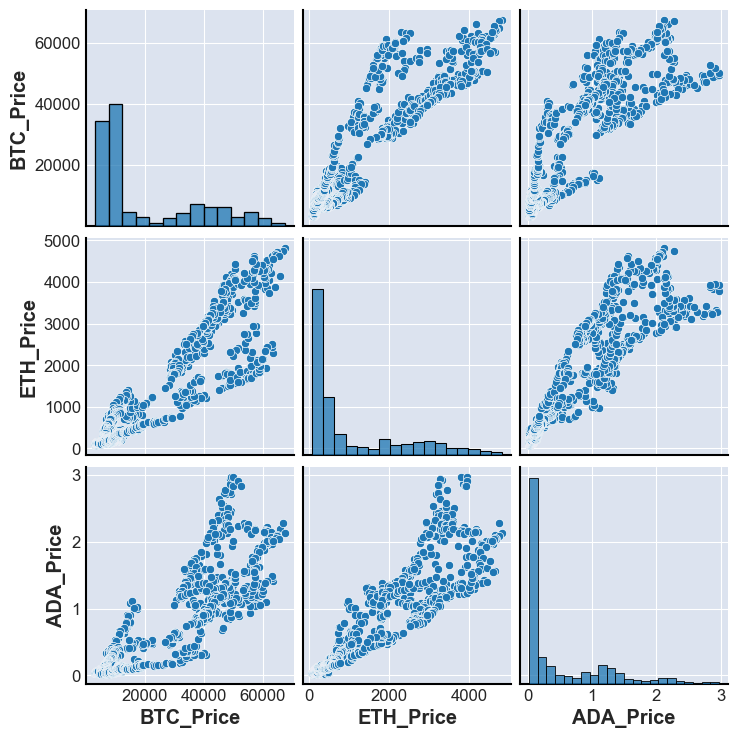

In [249]:
sns.pairplot(df_prices);

#### Relation between the Returns

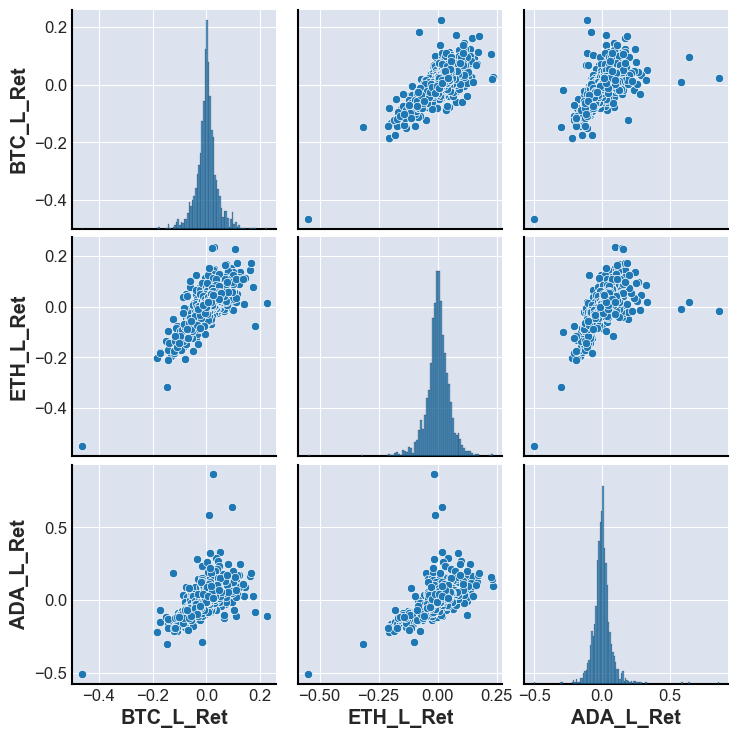

In [250]:
sns.pairplot(df_returns);

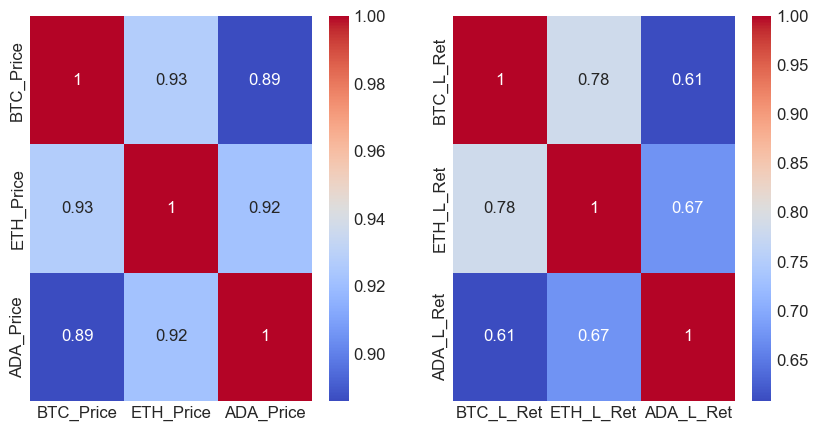

In [254]:
corr_matrix_prices  = df_prices.corr()
corr_matrix_returns = df_returns.corr()

fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.heatmap(corr_matrix_prices, cmap='coolwarm', annot=True, ax=ax[0])
sns.heatmap(corr_matrix_returns, cmap='coolwarm', annot=True, ax=ax[1])

plt.show()


**dagilim grafiklerinde returnler arasindaki iliski daha guclu gibi gorunurken isi haritalarinda tersi bir durum olustu bunu nasil aciklarsiniz?**

Bana Gore:  

Aslinda isi haritalarindaki gibi bir durum beklerdim, 
Domain Knowledge'ima gore fiyatlar hemen hemen Bitcoini baz alarak yon belirlerken farkli assetlerde **yuzdesel** olarak daha siddetli dalgalanmalar gorulebiliyor  
dolayisiyla fiyatlar arasindaki iliskinin return ler arasindaki iliskiden daha guclu olacagini bekliyordum  

Peki dagilim grafiklerinde neden tersi bir durum soz konusu?
Bunun verilerin **olcegiyle** ilgili oldugunu dusunuyorum. Daha dogrusu dagilma buyukluguyle.  
Sanirim buna Coefficient of Variation deniliyor. Yani iki farkli olcekteki veri setinin varyansini karsilastirmak icin bir nevi normalizasyon yapiyoruz   
Yukarida cizdigimiz histogramlara daha farkli acidan tekrar bakalim

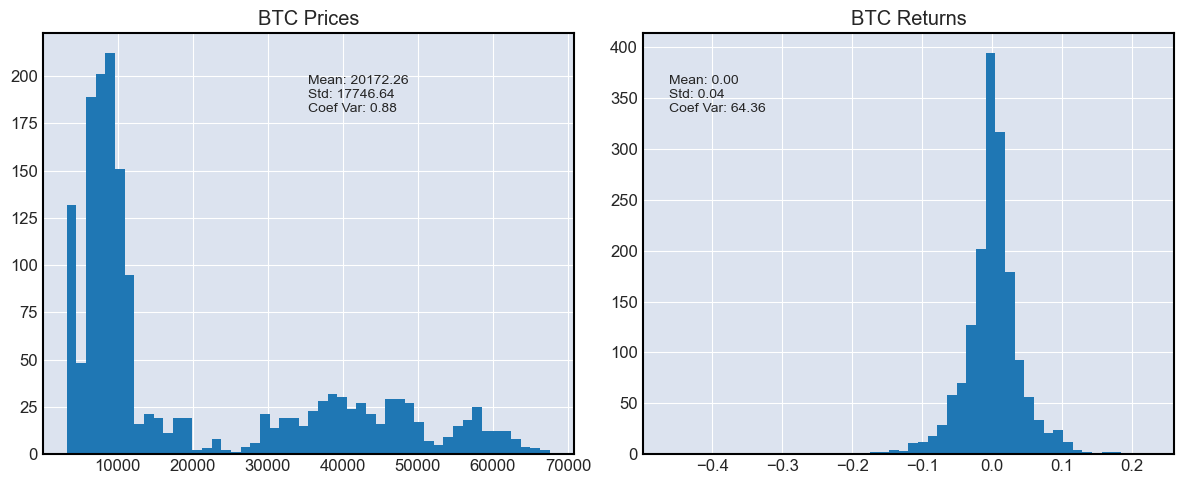

In [264]:
from scipy.stats import variation

mean_BTC_Price = df['BTC_Price'].mean()
std_BTC_Price = df['BTC_Price'].std()
coef_var_BTC_Price = variation(df['BTC_Price'])

mean_BTC_L_Ret = df['BTC_L_Ret'].mean()
std_BTC_L_Ret = df['BTC_L_Ret'].std()
coef_var_BTC_L_Ret = variation(df['BTC_L_Ret'])



# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histograms and add text
df['BTC_Price'].hist(bins=50, ax=axes[0])
axes[0].text(0.5, 0.9, f'Mean: {mean_BTC_Price:.2f}\nStd: {std_BTC_Price:.2f}\nCoef Var: {coef_var_BTC_Price:.2f}', transform=axes[0].transAxes, fontsize=10, verticalalignment='top')
axes[0].set_title('BTC Prices')

df['BTC_L_Ret'].hist(bins=50, ax=axes[1])
axes[1].text(0.05, 0.9, f'Mean: {mean_BTC_L_Ret:.2f}\nStd: {std_BTC_L_Ret:.2f}\nCoef Var: {coef_var_BTC_L_Ret:.2f}', transform=axes[1].transAxes, fontsize=10, verticalalignment='top')
axes[1].set_title('BTC Returns')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Goruldugu gibi Returns verileri daha kucuk bir olcekte cok daha buyuk bir dalgalanma gosteriyor olmasina ragmen yukaridaki **scatter plot** dagilim grafiklerine bu tam olarak yansiyamadi.  

Demek ki verileri analiz ederken Domain Knowledge ve Farkli Graik Turleriyle desteklemek ve bu gorsellestirmelere standart sapma, varyans, normalizasyon gibi islemler eklemek de analizi butunlestirmek acisindan onem arz etmektedir